# Integrating Machine Learning and Visualization for Accurate Chronic Kidney Disease Prediction

# Load the data 
Add neccesary Libraries like Pandas, Seaborn, MatplotLib, 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset from local machine
file_path = (r"C:\Users\nidhi\Documents\Spring_Semester\Dissertation\Kaggle-chronic kidney disease prediction\Chronic_Kidney_Dsease_data_Cleaned.csv")
df = pd.read_csv(file_path)

# EDA- 
## Handling Missing Values and Generating Descriptive Statistics

In this section, we address missing values and generate descriptive statistics to better understand the dataset.

1. **Fill Missing Numeric Values with the Median**:
   The numeric columns are filled with their respective median values to ensure continuity in the dataset.

2. **Generating Descriptive Statistics**:
   We then generate descriptive statistics to get an overview of the dataset's distribution and summary    statistics:

In [3]:
# Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# Descriptive Statistics for the data to understand the data.
print(df.describe())
print(df.describe(include=['object', 'category']))
print(df.dtypes)

         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620045     0.292948            9.969835   
std          0.910611     7.288658     0.455252          

In [4]:
import pandas as pd

# To display the data types of each variables to categorised them as categorical and continuous variable 
print(df.dtypes)

# Check the number of unique values in each feature(variable)
unique_values = df.nunique()

# Display unique values for each feature
print(unique_values)

# Identify categorical features based on unique values (low cardinality)
categorical_features = unique_values[unique_values < 20].index.tolist()  
print("Categorical Features:", categorical_features)

# Identify continuous features based on data types and high cardinality
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
continuous_features = [feature for feature in continuous_features if feature not in categorical_features]
print("Continuous Features:", continuous_features)


PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
GFR                              float64
ProteinInUrine  

## Visualizing the Data
After handling missing values and generating descriptive statistics, we proceed further with visualizing the data:

1. **Check for Class Imbalance**:
    We first check for class imbalance to understand the distribution of target classes. The data shows a high imbalance.

2. **Parallel Coordinates Plot (PCP)**:
    We generate a Parallel Coordinates Plot to visualize the data and identify patterns.

3. **Box Plot to Identify Outliers**:
    We create box plots to find and visualize outliers in the data.

4. **Correlation Analysis**:
    Once outliers are identified, we move towards analyzing the correlation between the features to understand their relationships.

### 1. Check for Class Imbalance:
We first check for class imbalance to understand the distribution of target classes. The data shows a high imbalance.

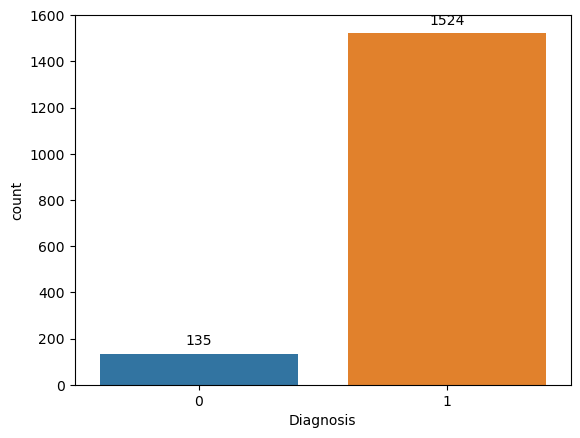

In [4]:
df['Diagnosis'].value_counts()

# visualise the target variable (Diagnosis)
ax = sns.countplot(x="Diagnosis", data=df)

# to add the labels in the count plot to understand the class imbalance
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

### 2. Parallel Coordinates Plot (PCP):
We generate a Parallel Coordinates Plot to visualize the data and identify patterns.

   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChem

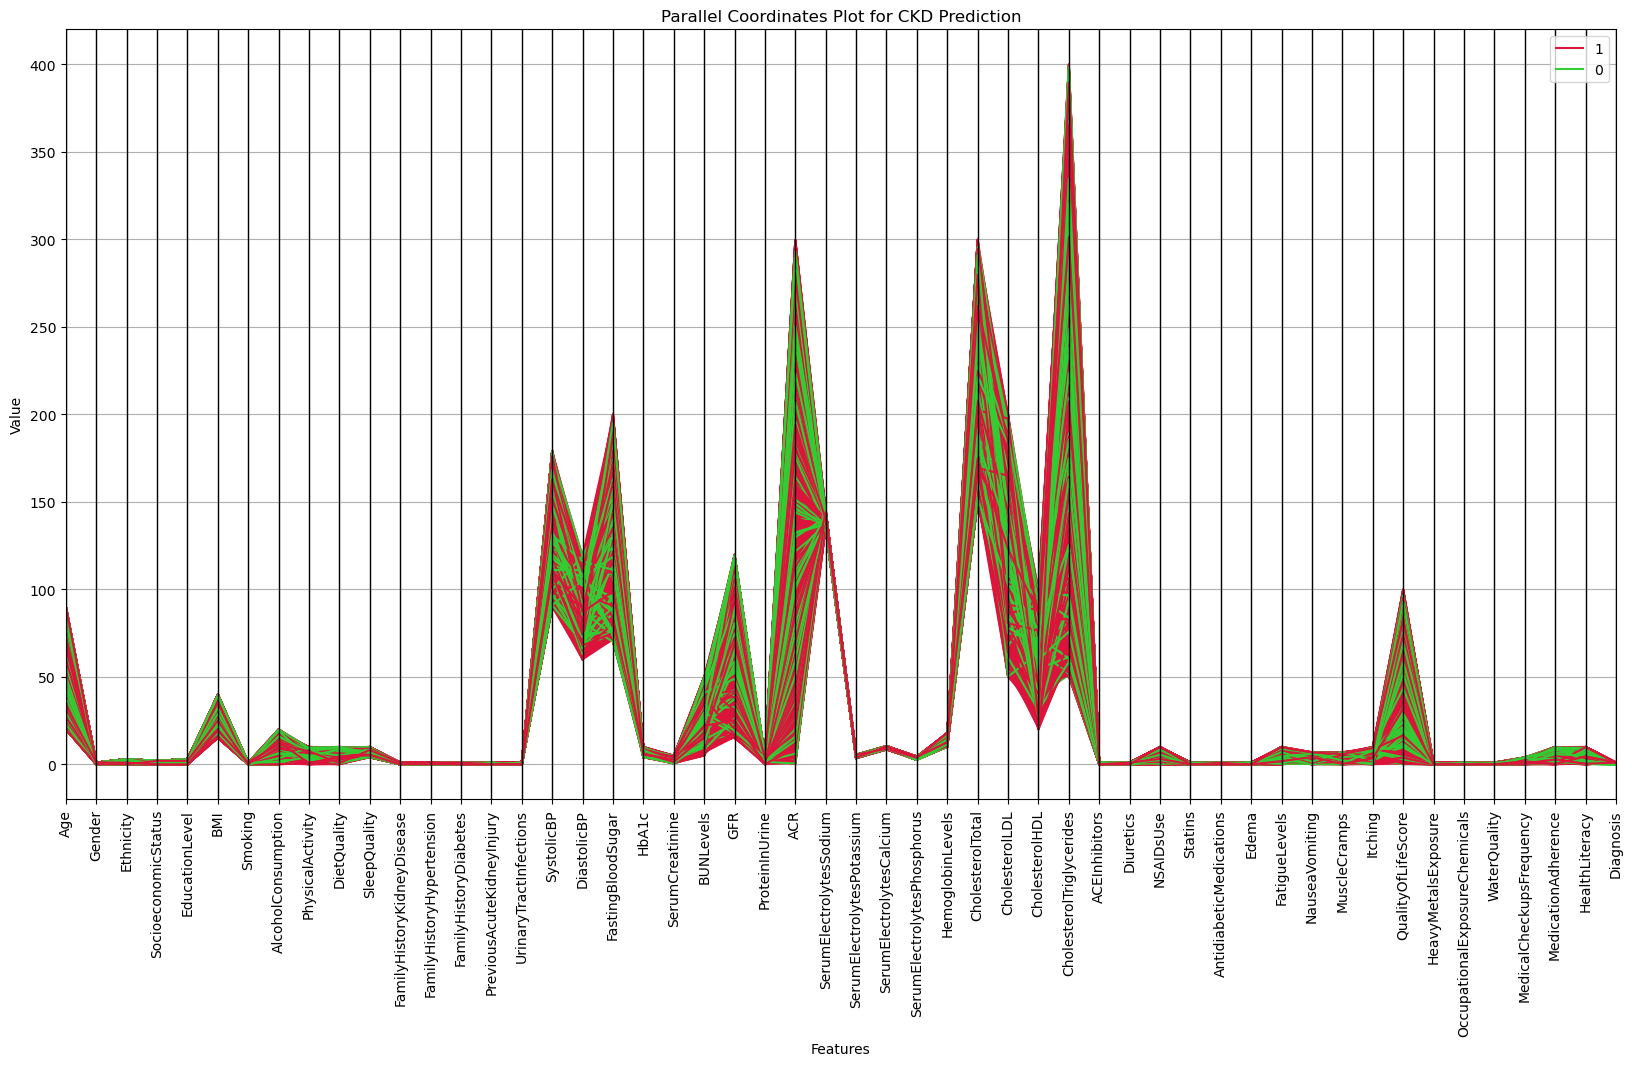

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# We add the columns to plot got PCP
columns_to_plot = [
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI',
    'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
    'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
    'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine',
    'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
    'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse',
    'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
    'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
    'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', 'Diagnosis'
]

# converting categorical variable to numerical variable
for column in columns_to_plot:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category').cat.codes

# Display the first few rows after conversion
print(df.head())

# Teaget variable 'Diagnosis' is also converted to a numerical code
if df['Diagnosis'].dtype == 'object':
    df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Plot the Parallel Coordinates Plot
plt.figure(figsize=(20, 10))
parallel_coordinates(df, 'Diagnosis', cols=columns_to_plot, color=('#DC143C','#32CD32'))
plt.title('Parallel Coordinates Plot for CKD Prediction')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


### 3. Box Plot to Identify Outliers:
We create box plots to find and visualize outliers in the data.

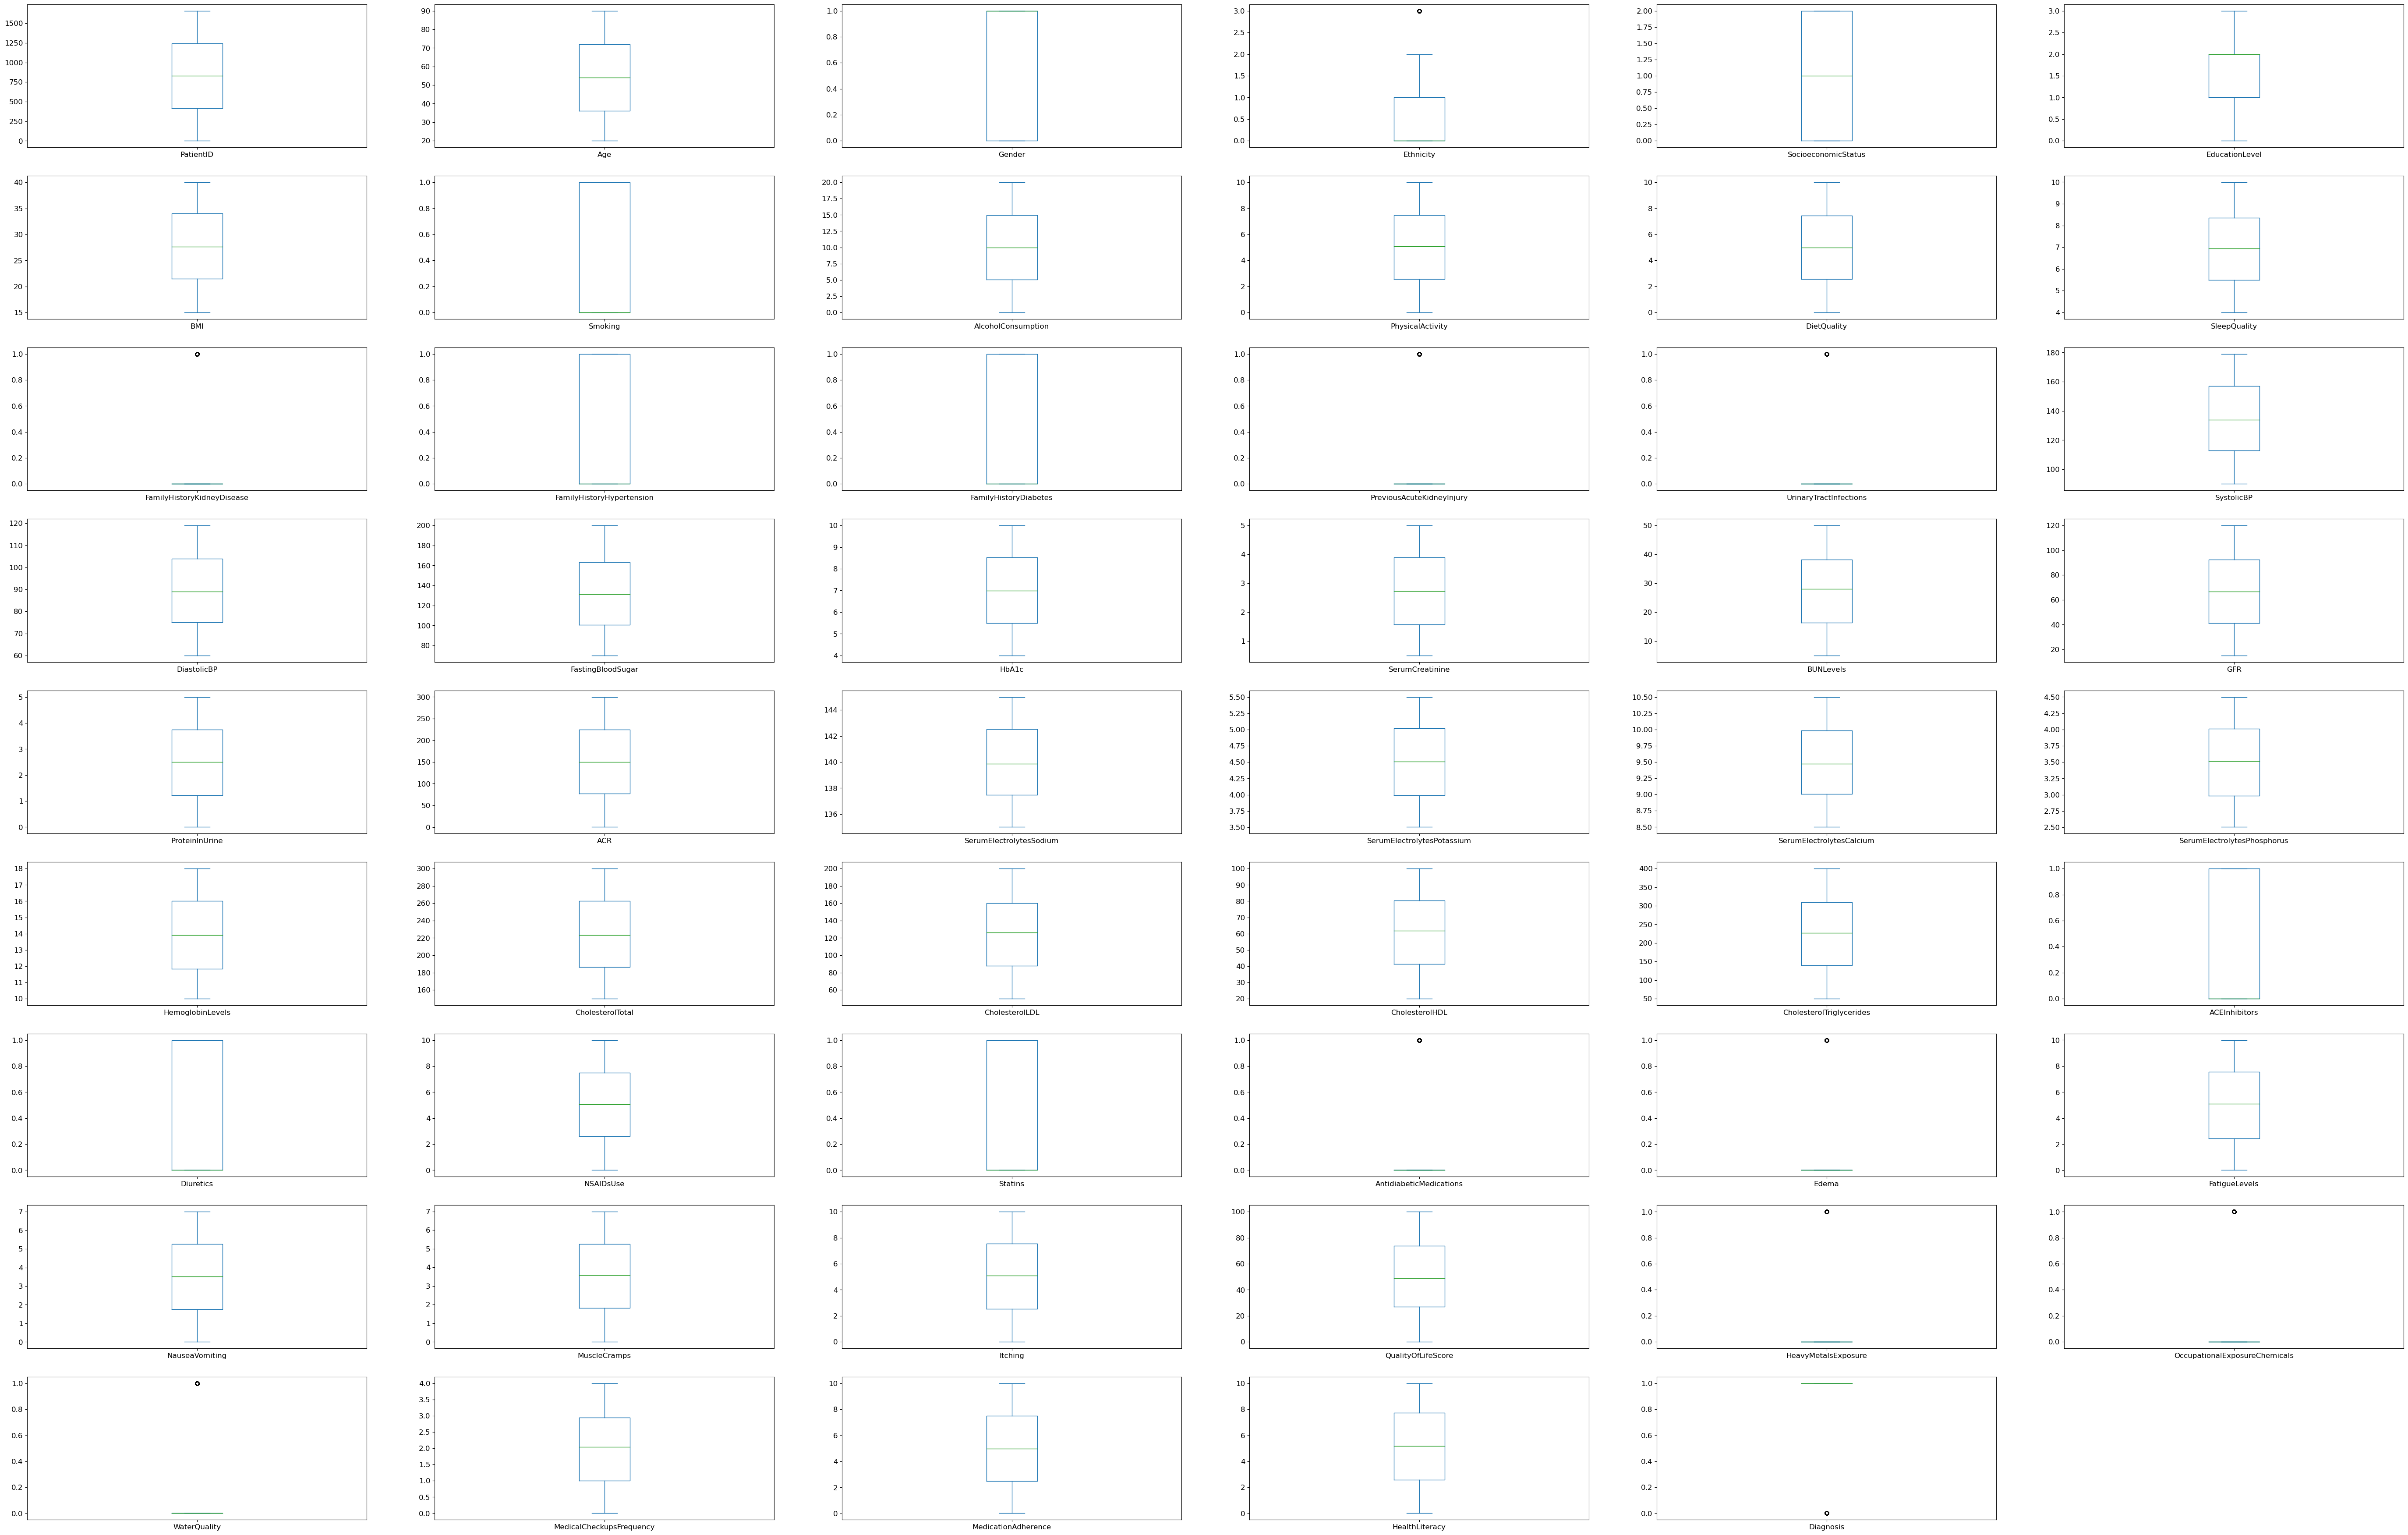

<Figure size 2000x1500 with 0 Axes>

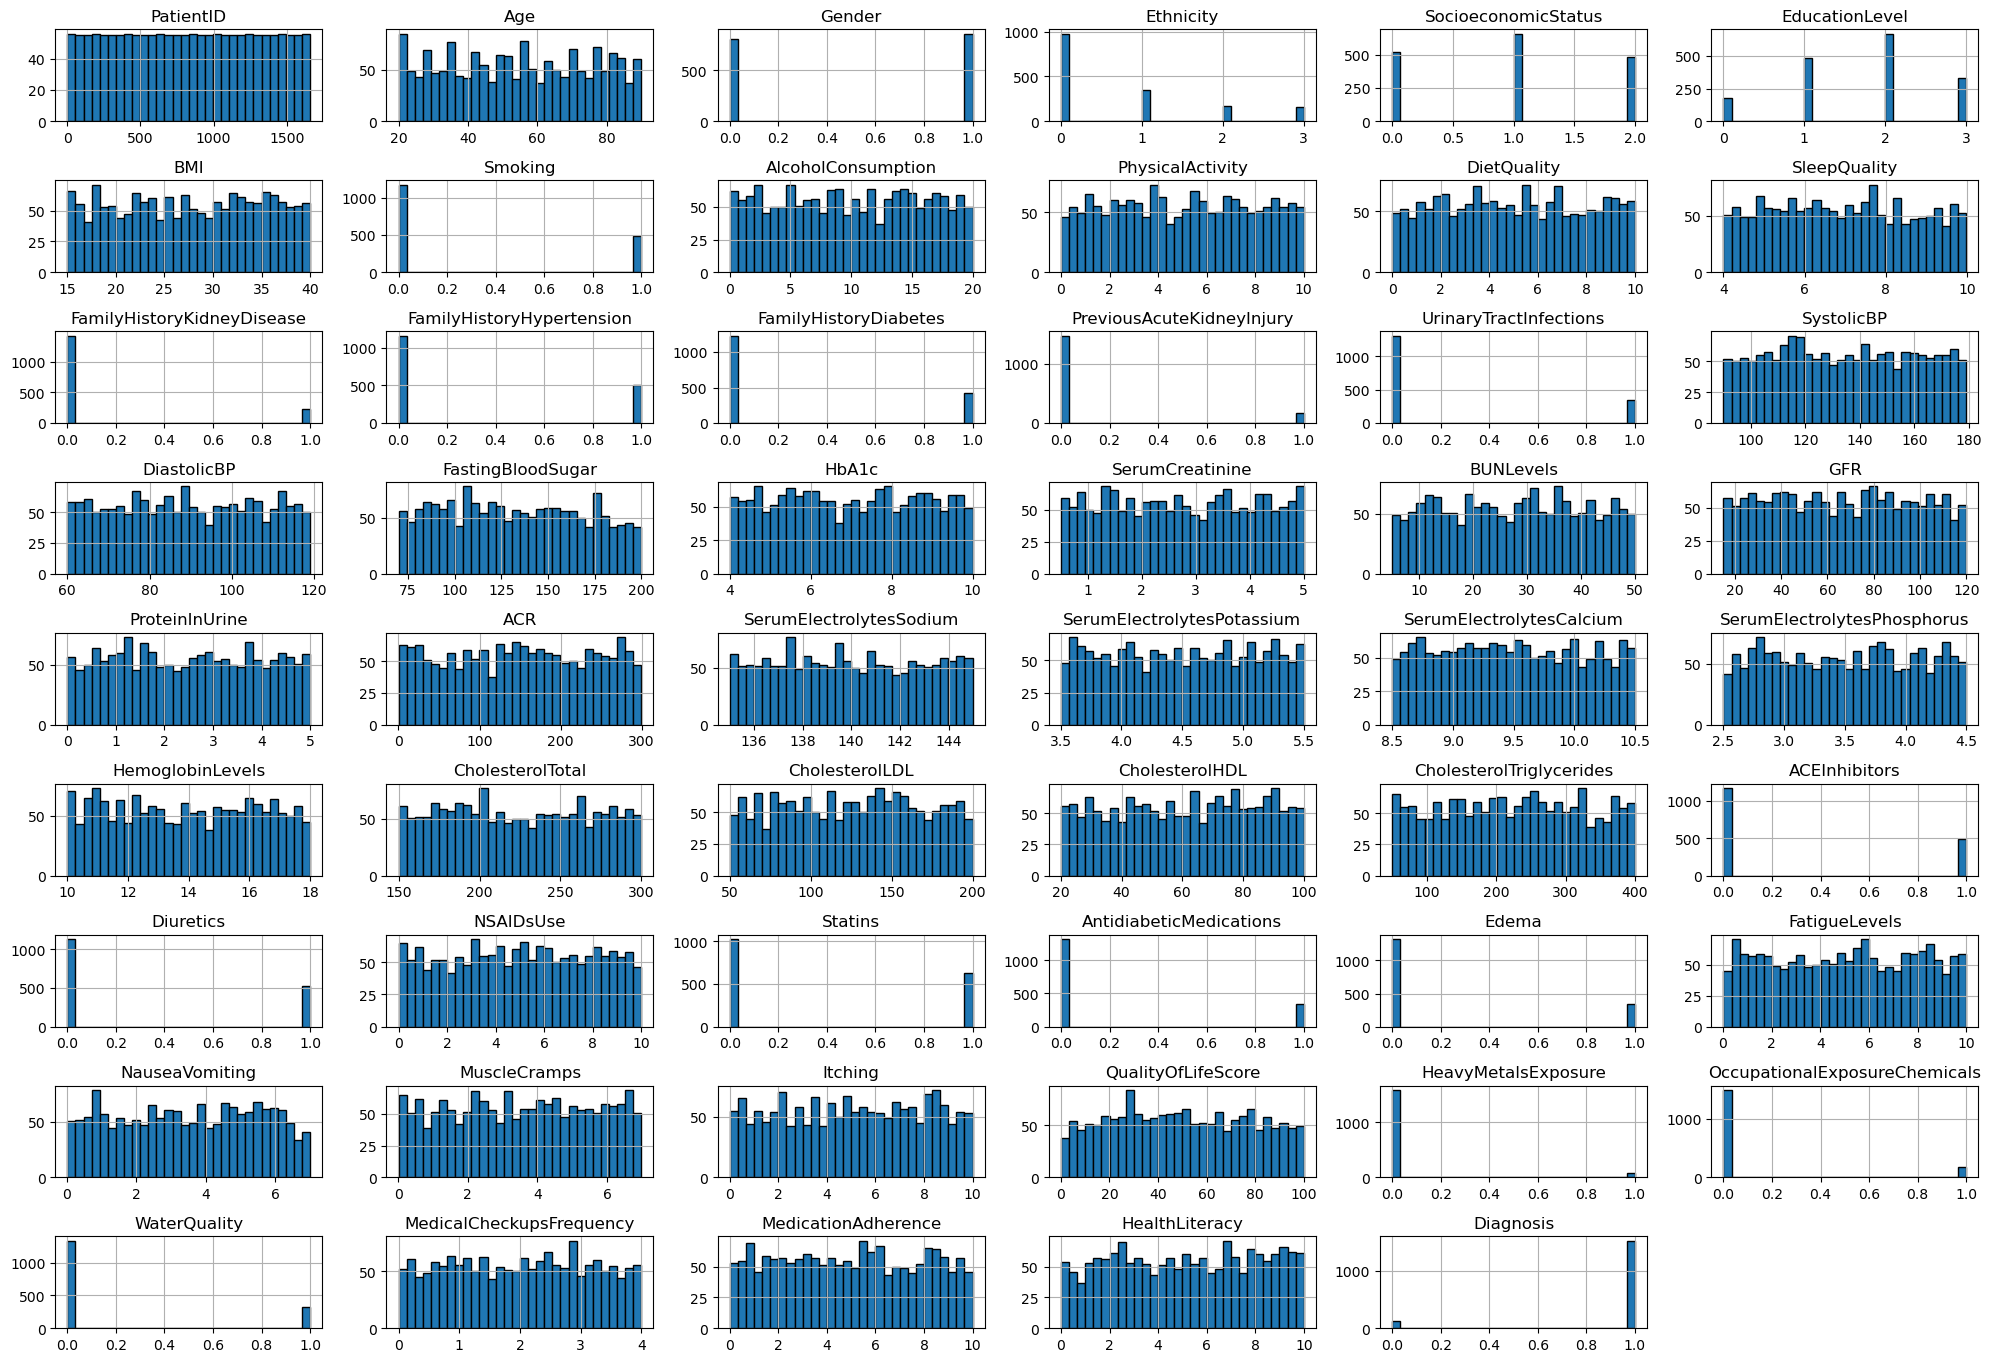

In [5]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(10,6), sharex=False,
sharey=False, fontsize=12, figsize=(70,50));


plt.figure(figsize=(20, 15))

# code to plot the histograms of all the features
df.hist(bins=30, figsize=(20, 15), layout=(10, 6), edgecolor='black')

# this is to adjust the spacing in order to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Correlation Analysis

1. **All Features Correlation**:
   We plot the correlation graphs for all the features to understand their interrelationships.

2. **Categorized Data Correlation**:
   The data is categorized and correlation graphs are plotted for each category.

3. **Correlation with Target Variable**:
   Finally, we plot the correlation of all the features with the target variable "Diagnosis".


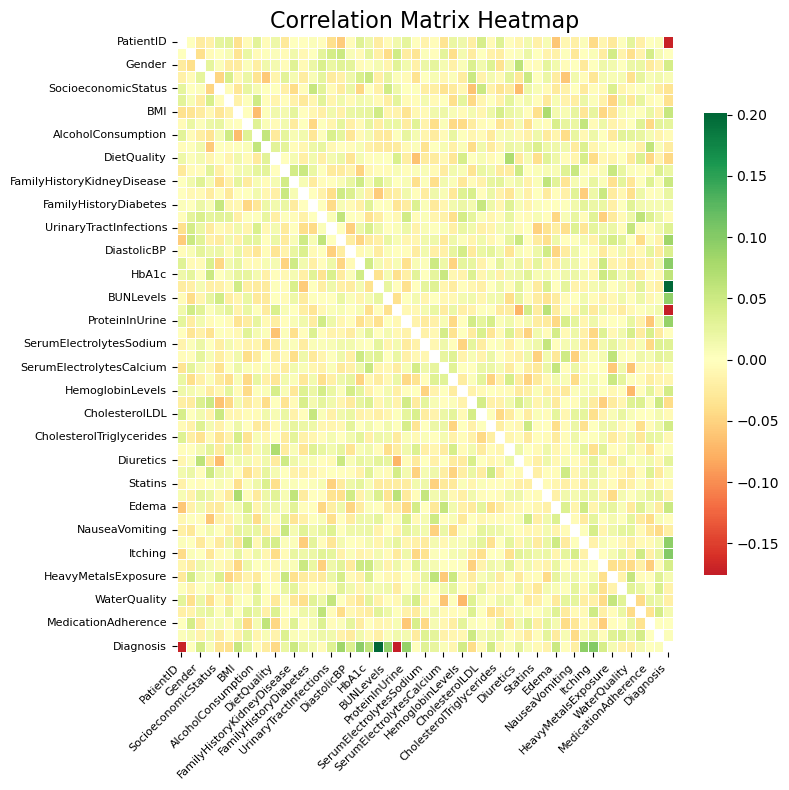

In [6]:

# for correlation we select only numerical columns 
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix of the numerical columns
corr_matrix = numeric_df.corr()

# Create a mask for the diagonal so that there is white strip in between upper and lower matrix
mask = np.eye(corr_matrix.shape[0], dtype=bool)

# to plot the figure
plt.figure(figsize=(8, 8))

# adding additional paramters like colors, line width etc.
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdYlGn', center=0, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.75})

# titles of the plot and the font size.
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.show()

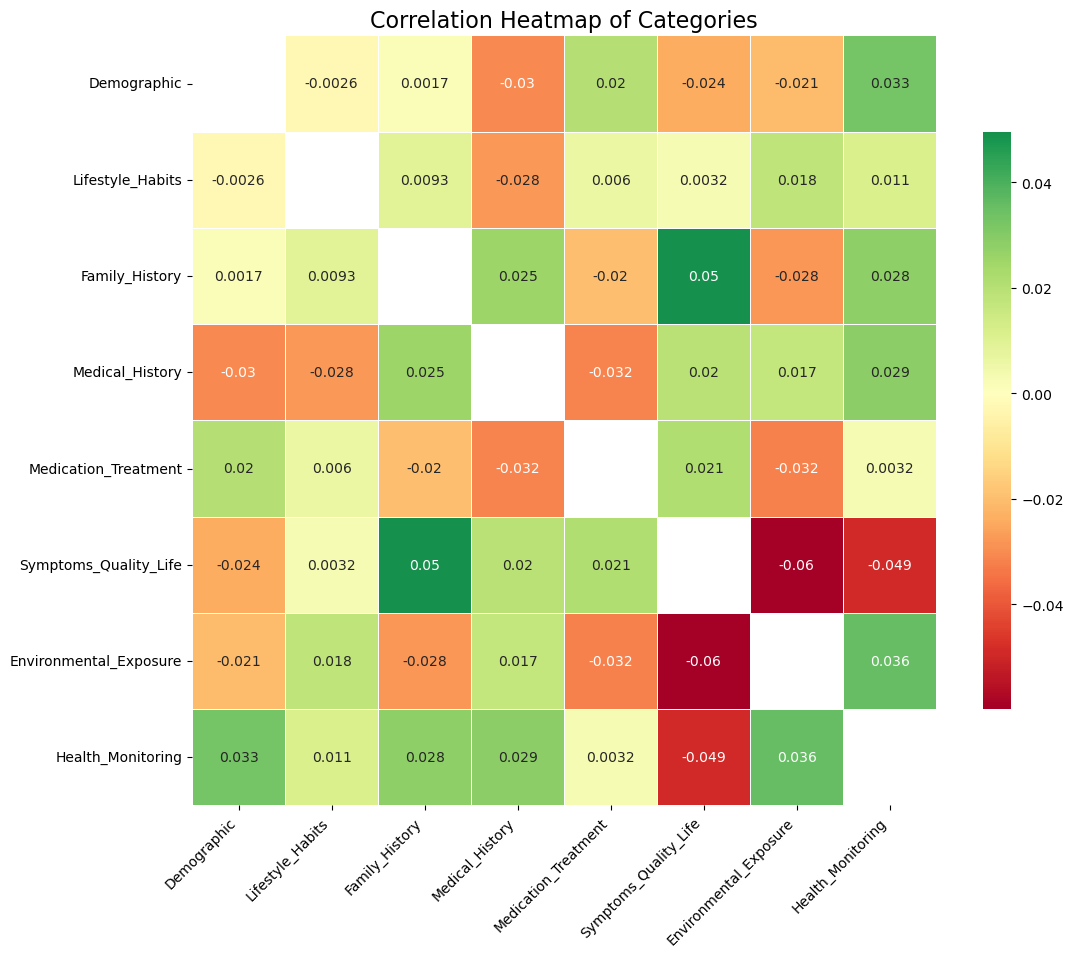

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# categorize the 54 columns into 8 categories 
categories = {
    'Demographic': ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel'],
    'Lifestyle_Habits': ['Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality'],
    'Family_History': ['FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes'],
    'Medical_History': ['BMI', 'PreviousAcuteKidneyInjury', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
                        'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
                        'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides'],
    'Medication_Treatment': ['ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications'],
    'Symptoms_Quality_Life': ['Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore'],
    'Environmental_Exposure': ['HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'],
    'Health_Monitoring': ['MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'],
}

# then aggregate the categories.
aggregated_data = {category: df[columns].mean(axis=1) for category, columns in categories.items()}

# Creating a DataFrame from the aggregated data
aggregated_df = pd.DataFrame(aggregated_data)

# Compute the correlation matrix
corr_matrix = aggregated_df.corr()

# Create a mask for the diagonal so that there is seperation among upper and lower matrix
mask = np.eye(corr_matrix.shape[0], dtype=bool)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and other features like color, font size, line width etc
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn', center=0, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.75})

# adding the titles for the plot
plt.title('Correlation Heatmap of Categories', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()


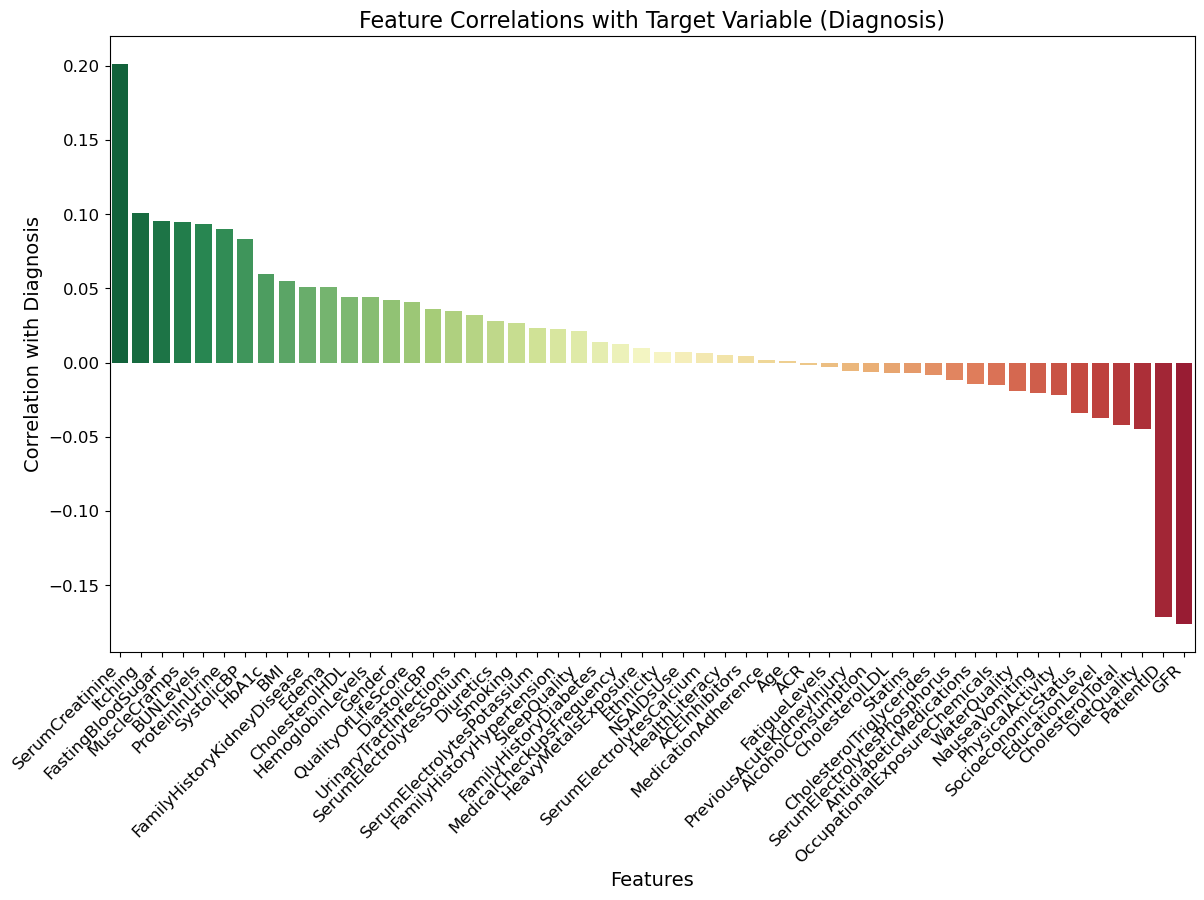

SerumCreatinine                  0.201131
Itching                          0.100665
FastingBloodSugar                0.095694
MuscleCramps                     0.094811
BUNLevels                        0.093099
ProteinInUrine                   0.089989
SystolicBP                       0.083528
HbA1c                            0.059982
BMI                              0.055221
FamilyHistoryKidneyDisease       0.050935
Edema                            0.050857
CholesterolHDL                   0.044342
HemoglobinLevels                 0.044006
Gender                           0.042239
QualityOfLifeScore               0.040656
DiastolicBP                      0.036383
UrinaryTractInfections           0.034617
SerumElectrolytesSodium          0.032378
Diuretics                        0.028236
Smoking                          0.026875
SerumElectrolytesPotassium       0.023677
FamilyHistoryHypertension        0.022520
SleepQuality                     0.021265
FamilyHistoryDiabetes            0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# select only numerical column as pearson test is for numerical columns only
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with the target variable-Diagnosis
correlation_with_target = numeric_df.corr()['Diagnosis'].drop('Diagnosis')

# add to sort the data from positve to negative correlation
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# plotting the figure, adding the color, font size,and rotating the features so that all the features are visible
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_target_sorted.index, y=correlation_with_target_sorted.values, palette='RdYlGn_r')
plt.title('Feature Correlations with Target Variable (Diagnosis)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with Diagnosis', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#print the correlation of feature with target variable-Diagnosis in order
print(correlation_with_target_sorted)
# # Get top 15 and bottom 15 features
# top_15_correlation = correlation_with_target_sorted.head(15).index.tolist()
# bottom_15_correlation = correlation_with_target_sorted.tail(12).index.tolist()

# print("Top 15 features by correlation with Diagnosis:")
# print(top_15_correlation)

# print("\nBottom 15 features by correlation with Diagnosis:")
# print(bottom_15_correlation)



### Feature Selection
### Step 1: List of Features
- **Categorical Features:** List all categorical features.
- **Continuous Features:** List all continuous features.

### Step 2: Chi-Square Test for Categorical Features
- Use the Chi-Square test to assess the relationship between categorical features and the target variable.
- Select features based on the p-value threshold (e.g., p-value < 0.05).

### Step 3: ANOVA Test for Continuous Features
- Apply the ANOVA test to evaluate significant differences between groups for continuous features.
- Select features based on the p-value threshold.

### Step 4: Combine Results from Chi-Square and ANOVA
- Combine the significant features from the Chi-Square and ANOVA tests into a single feature set.

### Step 5: Recursive Feature Elimination (RFE)
- Perform Recursive Feature Elimination (RFE) using two models:
  1. **Logistic Regression**
  2. **Random Forest**
- Use RFE to select the most important features by removing the least significant ones iteratively.


### Top 5 Features using Logistic Regresion Model for RFE

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# identified categorical  and continuous features from descriptive analysis
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking',
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
    'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'ACEInhibitors', 'Diuretics',
    'Statins', 'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure',
    'OccupationalExposureChemicals', 'WaterQuality'
]

continuous_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine',
    'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
    'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting',
    'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
    'HealthLiteracy'
]

# Performing chi square test for categorical features
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Diagnosis'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = p

# ANOVA Test for continuous features
anova_results = {}
for feature in continuous_features:
    groups = [df[feature][df['Diagnosis'] == val] for val in df['Diagnosis'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = p_val

# combining the test results from both the test to add in the recursive feature eleimination(RFE) models
selected_features = list(set(chi2_results.keys()) | set(anova_results.keys()))

# creating the dataframe 
df_selected = df[selected_features]
X = df_selected
y = df['Diagnosis']  # Target variable

# Standardize the features before applying RFE so as to keep the numerical stability og models intact
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe = rfe.fit(X_scaled, y)

# Get the ranking of the features
ranking = rfe.ranking_
selected_rfe_features = X.columns[rfe.support_]

# Combining the results into a DataFrame for better readability
rfe_results = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
rfe_results = rfe_results.sort_values(by='Ranking')

# Displaying the top 5 the selected features
print("Top 5 features selected by RFE(Logistic Regression):")
print(selected_rfe_features.tolist())


Top 5 features selected by RFE(Logistic Regression):
['FastingBloodSugar', 'Itching', 'SerumCreatinine', 'GFR', 'MuscleCramps']


### Top 5 Features using Random Forest as RFE

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# identified categorical  and continuous features from descriptive analysis
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking',
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
    'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'ACEInhibitors', 'Diuretics',
    'Statins', 'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure',
    'OccupationalExposureChemicals', 'WaterQuality'
]

continuous_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine',
    'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
    'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting',
    'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
    'HealthLiteracy'
]

# Chi-Square Test for categorical features
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Diagnosis'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = p

# ANOVA Test for continuous features
anova_results = {}
for feature in continuous_features:
    groups = [df[feature][df['Diagnosis'] == val] for val in df['Diagnosis'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = p_val

# Union of selected features from Chi-Square and ANOVA tests
selected_features = list(set(chi2_results.keys()) | set(anova_results.keys()))

# Subset the dataset with the selected features
df_selected = df[selected_features]
X = df_selected
y = df['Diagnosis']  # Target variable

# Standardize the features before applying RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)# to handle the class imbalance we use class weight as balanced

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe = rfe.fit(X_scaled, y)

# Get the ranking of the features
ranking = rfe.ranking_
selected_rfe_features = X.columns[rfe.support_]

# Combine the results into a DataFrame for better readability
rfe_results = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
rfe_results = rfe_results.sort_values(by='Ranking')

# Displaying the top 5 features for random forest as RFE model
print("Top 5 features selected by RFE with Random Forest:")
print(selected_rfe_features.tolist())


Top 5 features selected by RFE with Random Forest:
['FastingBloodSugar', 'ProteinInUrine', 'Itching', 'SerumCreatinine', 'GFR']


## Model Training and Evaluation
Once the features are selected from both RFE techniques, the next step is to train the model using the features obtained:
### Model using Features selected by logistic regression as RFE Model

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Features selected From Logisitc Regression as RFE Model
selected_features = [
'Itching', 'FastingBloodSugar', 'SerumCreatinine', 'GFR', 'MuscleCramps'
]

# Subset the dataset to include only the selected features
X_selected = df[selected_features]
y_resampled = df['Diagnosis']  #'Diagnosis' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Defining the models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True) 
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Using a pipeline to standardize data 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

# Print the evaluation metrics and classification report for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print("  Classification Report:")
    print(metrics['classification_report'])
    print()


Model: Logistic Regression
  Accuracy: 0.9217
  Recall: 1.0000
  Precision: 0.9215
  F1 Score: 0.9591
  Balanced Accuracy: 0.5185
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.96      0.52      0.52       332
weighted avg       0.93      0.92      0.89       332


Model: K-Nearest Neighbors
  Accuracy: 0.9127
  Recall: 0.9738
  Precision: 0.9340
  F1 Score: 0.9535
  Balanced Accuracy: 0.5980
  Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.22      0.29        27
           1       0.93      0.97      0.95       305

    accuracy                           0.91       332
   macro avg       0.68      0.60      0.62       332
weighted avg       0.89      0.91      0.90       332


Model: Random Forest
  Accuracy: 0

### Model using Features selected by Random Forest as RFE Model

In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Features Selected from Random Forest as RFE Model
selected_features = [
'Itching', 'FastingBloodSugar', 'SerumCreatinine', 'GFR', 'ProteinInUrine'
]

# Subset the dataset to include only the selected features
X_selected = df[selected_features]
y_resampled = df['Diagnosis']  #'Diagnosis' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True) 
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Using a pipeline to standardize data (necessary for models like SVM)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

# Print the evaluation metrics and classification report for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print("  Classification Report:")
    print(metrics['classification_report'])
    print()


Model: Logistic Regression
  Accuracy: 0.9277
  Recall: 1.0000
  Precision: 0.9271
  F1 Score: 0.9621
  Balanced Accuracy: 0.5556
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        27
           1       0.93      1.00      0.96       305

    accuracy                           0.93       332
   macro avg       0.96      0.56      0.58       332
weighted avg       0.93      0.93      0.90       332


Model: K-Nearest Neighbors
  Accuracy: 0.9187
  Recall: 0.9803
  Precision: 0.9344
  F1 Score: 0.9568
  Balanced Accuracy: 0.6013
  Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.22      0.31        27
           1       0.93      0.98      0.96       305

    accuracy                           0.92       332
   macro avg       0.72      0.60      0.63       332
weighted avg       0.90      0.92      0.90       332


Model: Random Forest
  Accuracy: 0

### Visualise the results Obtained from Random forest as RFE

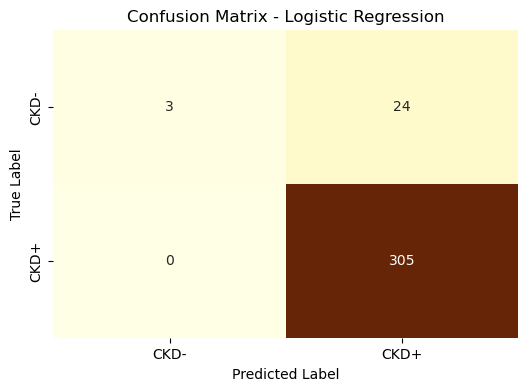

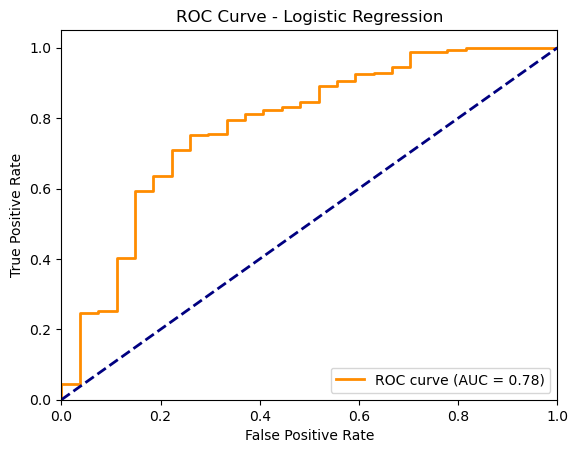

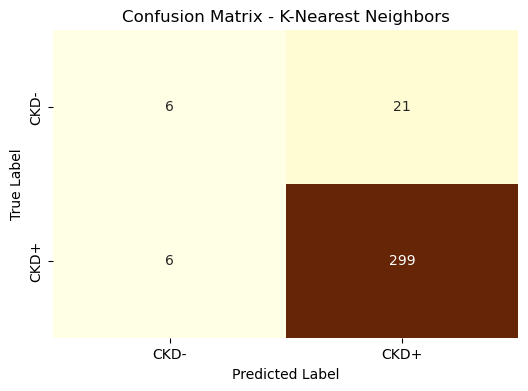

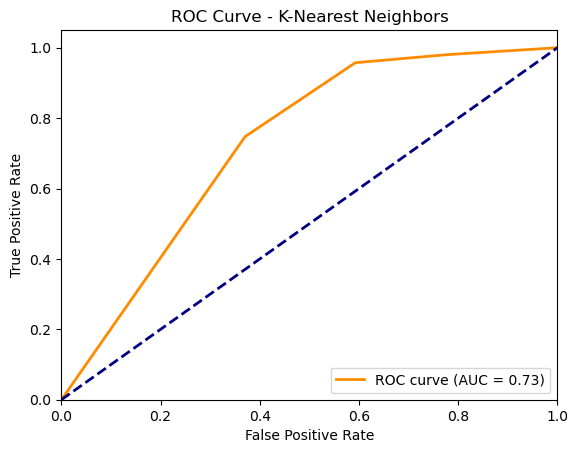

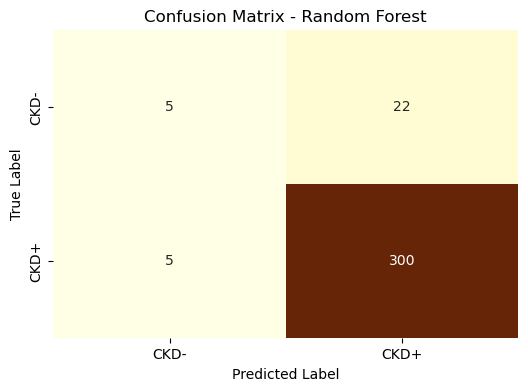

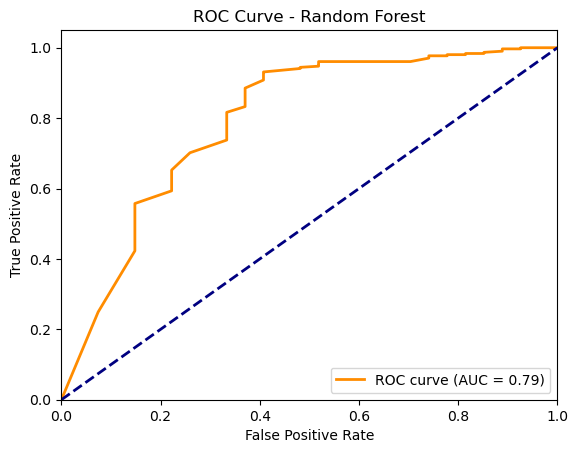

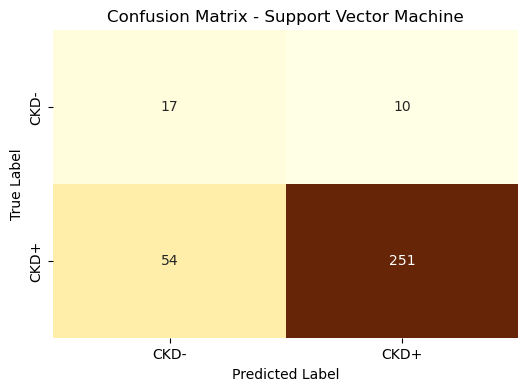

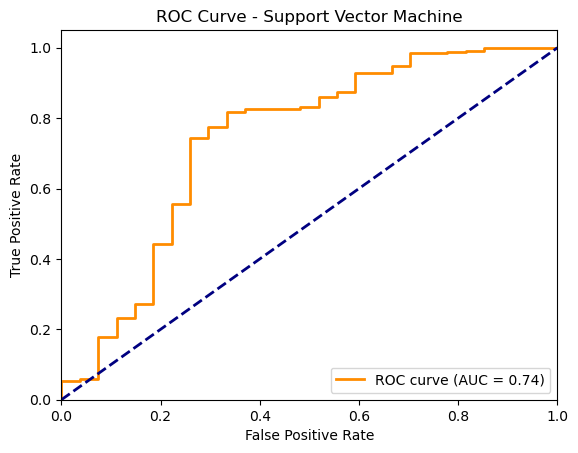

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train and evaluate each model
for model_name, model in models.items():
    # Using a pipeline to standardize data (necessary for models like SVM)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Get the predicted probabilities for ROC curve (if available)
    if hasattr(pipeline, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", cbar=False, xticklabels=['CKD-', 'CKD+'], yticklabels=['CKD-', 'CKD+'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve 
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()


## Handling the Data imbalance
The dataset presents an uneven balance of both the class with class 1 in majority and class 0 in minority . To add handle this SMOTE is applied to generate more balanced results
## Models using Logistic Regresion as RFE and Resampling techniques(SMOTE)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Features from LR as RFE model
selected_features = [
'Itching', 'FastingBloodSugar', 'SerumCreatinine', 'GFR', 'MuscleCramps'
]

# Subset the dataset to include only the selected features
X_selected = df[selected_features]
y = df['Diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True) 
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Using a pipeline to standardize data 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Fit the model on the resampled training data
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

# Print the evaluation metrics and classification report for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print("  Classification Report:")
    print(metrics['classification_report'])
    print()


Model: Logistic Regression
  Accuracy: 0.7229
  Recall: 0.7246
  Precision: 0.9651
  F1 Score: 0.8277
  Balanced Accuracy: 0.7141
  Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.70      0.29        27
           1       0.97      0.72      0.83       305

    accuracy                           0.72       332
   macro avg       0.57      0.71      0.56       332
weighted avg       0.90      0.72      0.78       332


Model: K-Nearest Neighbors
  Accuracy: 0.7440
  Recall: 0.7508
  Precision: 0.9622
  F1 Score: 0.8435
  Balanced Accuracy: 0.7087
  Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.67      0.30        27
           1       0.96      0.75      0.84       305

    accuracy                           0.74       332
   macro avg       0.58      0.71      0.57       332
weighted avg       0.90      0.74      0.80       332


Model: Random Forest
  Accuracy: 0

### Visualising the results in the form of ROC curve, Confusion Matrix  for each model so as to understand the model performance better

Visualizing results for: Logistic Regression


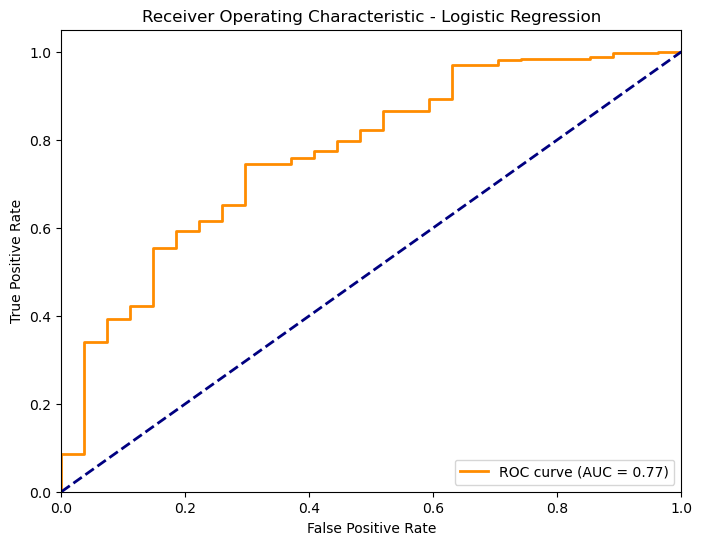

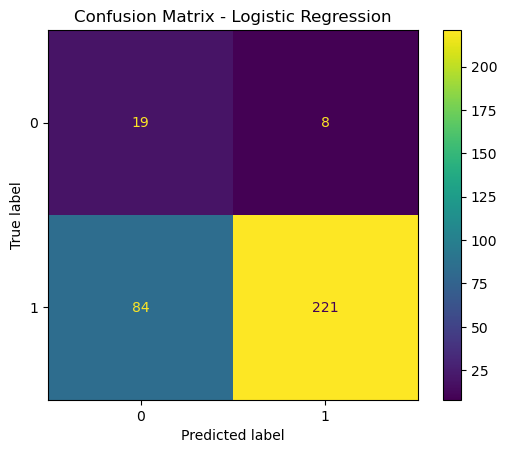

Visualizing results for: K-Nearest Neighbors


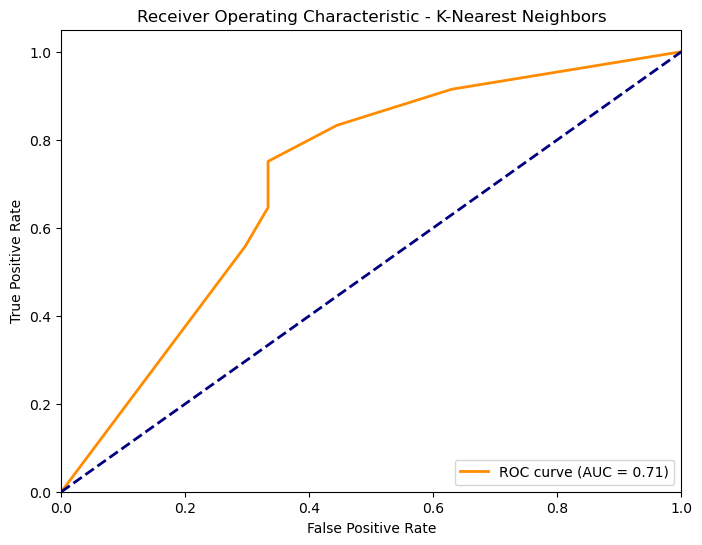

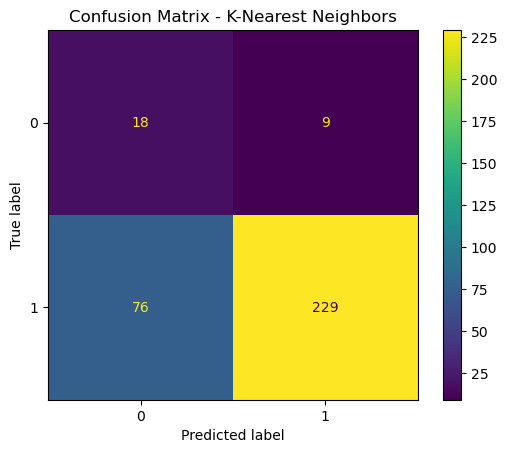

Visualizing results for: Random Forest


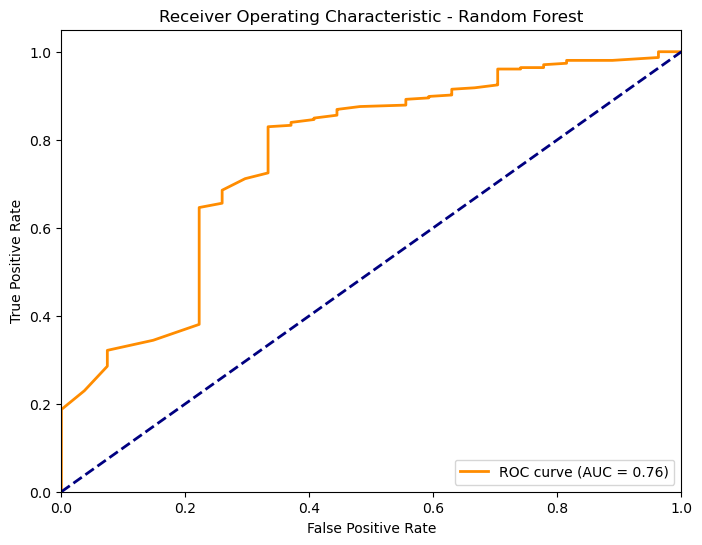

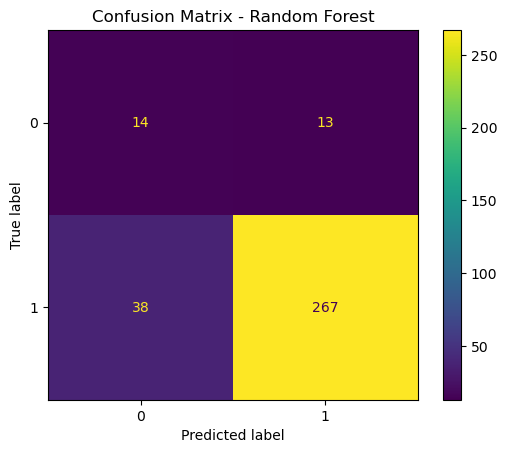

Visualizing results for: Support Vector Machine


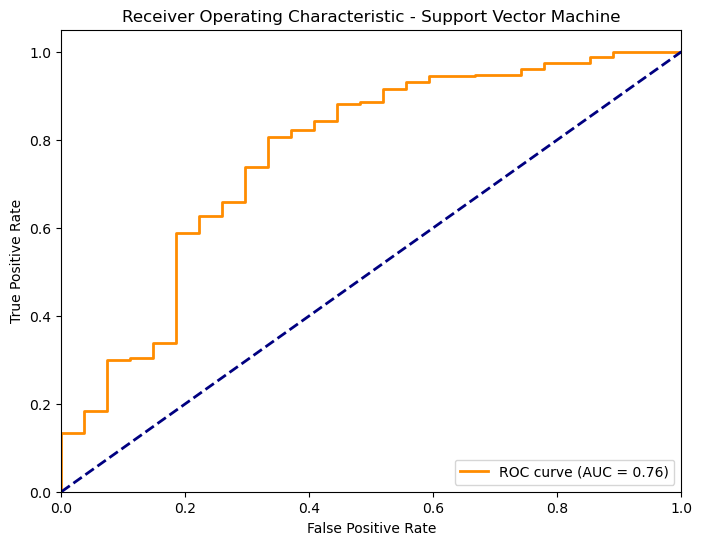

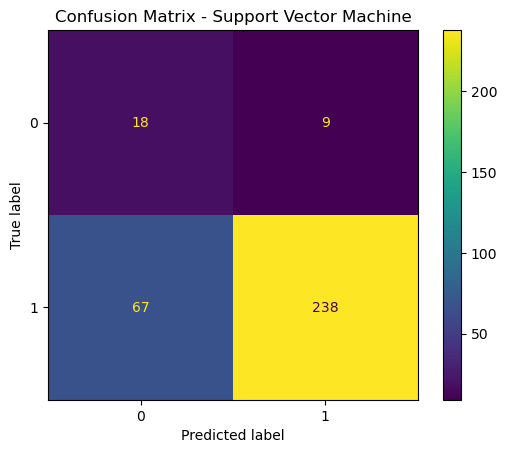

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot confusion matrix
def plot_confusion(model, X_test, y_test, model_name):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')
    plt.show()

# Visualize models
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Ensuring the scaler is included
        ('model', model)
    ])
    # Fit the model
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    print(f"Visualizing results for: {model_name}")
    
    # Plot ROC curve
    plot_roc_curve(pipeline, X_test, y_test, model_name)
    
    # Plot confusion matrix
    plot_confusion(pipeline, X_test, y_test, model_name)


## Models using Random Forest as RFE and Resampling techniques(SMOTE)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Features Selectd by Random Forest as RFE model
selected_features = [
    'Itching', 'FastingBloodSugar', 'SerumCreatinine', 'GFR', 'ProteinInUrine'
]

# Subset the dataset to include only the selected features
X_selected = df[selected_features]
y = df['Diagnosis']  # target variable

# Split the data into training and testing sets(80-20)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Evaluate Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', LogisticRegression(random_state=42))
])
logreg_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Model: Logistic Regression")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")
print(f"  Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_logreg):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print()

# Evaluate K-Nearest Neighbors
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', KNeighborsClassifier())
])
knn_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_pipeline.predict(X_test)

print("Model: K-Nearest Neighbors")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"  Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_knn):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_knn))
print()

# Evaluate Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
rf_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_pipeline.predict(X_test)

print("Model: Random Forest")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"  Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_rf):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_rf))
print()

# Evaluate Support Vector Machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', SVC(random_state=42, class_weight='balanced', probability=True))
])
svm_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_pipeline.predict(X_test)

print("Model: Support Vector Machine")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"  Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_svm):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_svm))
print()


Model: Logistic Regression
  Accuracy: 0.7229
  Recall: 0.7246
  Precision: 0.9651
  F1 Score: 0.8277
  Balanced Accuracy: 0.7141
  Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.70      0.29        27
           1       0.97      0.72      0.83       305

    accuracy                           0.72       332
   macro avg       0.57      0.71      0.56       332
weighted avg       0.90      0.72      0.78       332


Model: K-Nearest Neighbors
  Accuracy: 0.7139
  Recall: 0.7246
  Precision: 0.9526
  F1 Score: 0.8231
  Balanced Accuracy: 0.6586
  Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.59      0.25        27
           1       0.95      0.72      0.82       305

    accuracy                           0.71       332
   macro avg       0.56      0.66      0.54       332
weighted avg       0.89      0.71      0.78       332


Model: Random Forest
  Accuracy: 0

### Visualising the results in the form of ROC curve, Confusion Matrix  for each model so as to understand the model performance better

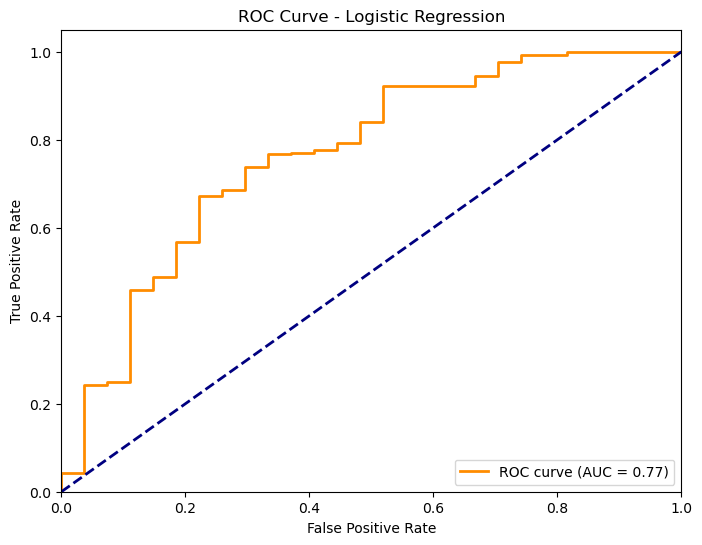

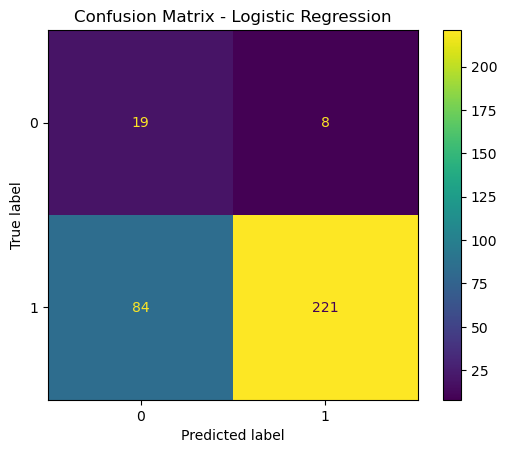

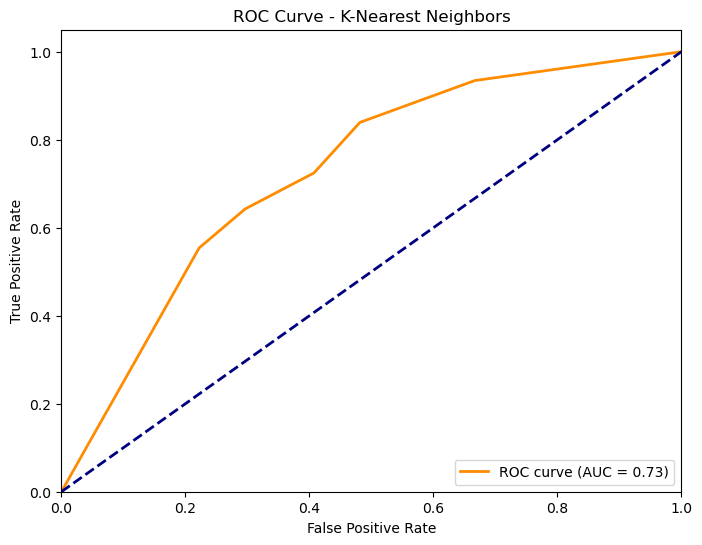

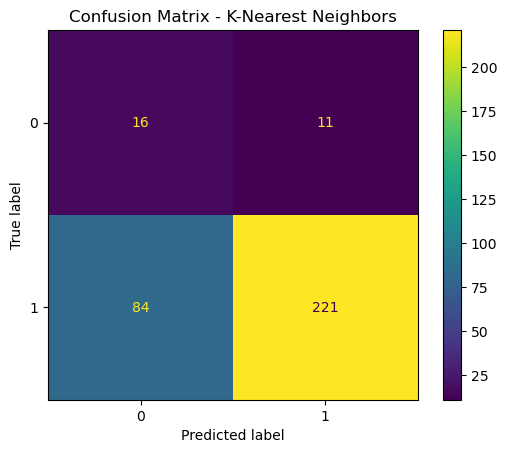

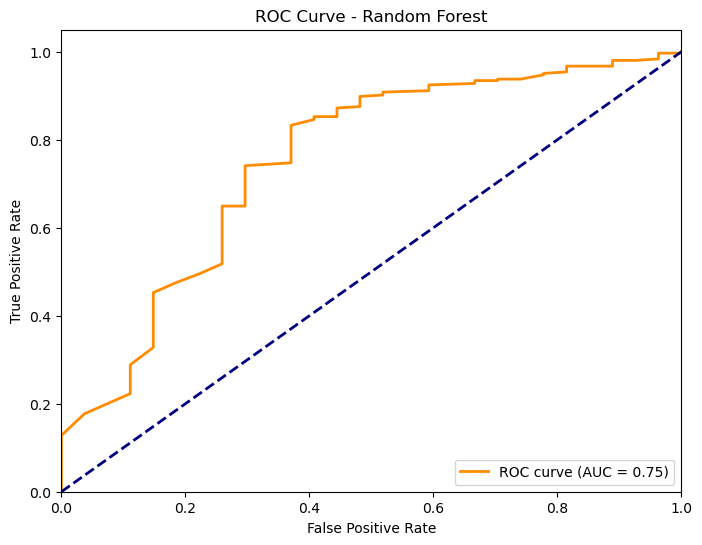

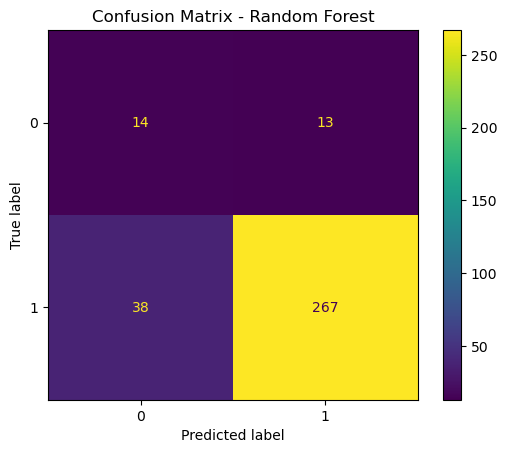

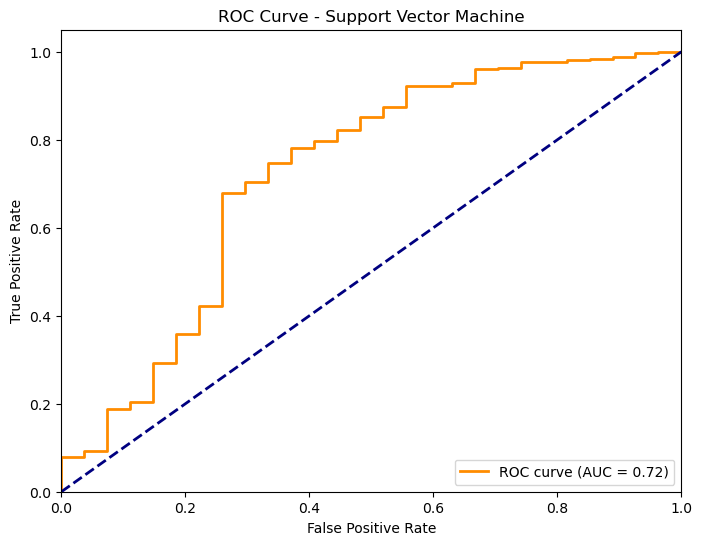

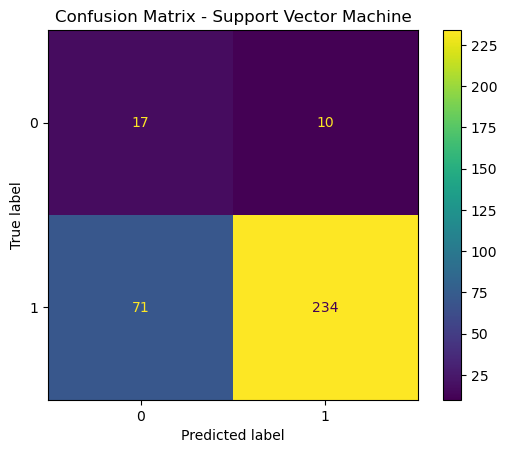

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(pipeline, X_test, y_test, model_name):
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(pipeline, X_test, y_test, model_name):
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Visualize ROC curve and confusion matrix for each model
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Fit the model on the resampled training data
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Plot ROC curve
    if hasattr(model, "predict_proba"):  # Only models with probability estimates
        plot_roc_curve(pipeline, X_test, y_test, model_name)
    
    # Plot confusion matrix
    plot_confusion_matrix(pipeline, X_test, y_test, model_name)


 ### Additionally check the Precision-Recall Trade off  to chekc whether the threshold assumed for models is correct or not

              precision    recall  f1-score   support

           0       0.29      0.30      0.29        27
           1       0.94      0.93      0.94       305

    accuracy                           0.88       332
   macro avg       0.61      0.62      0.61       332
weighted avg       0.88      0.88      0.88       332



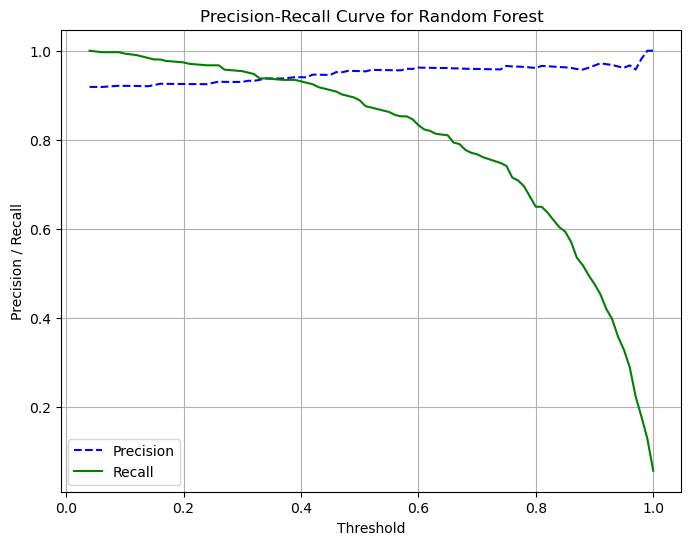

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Fit the Random Forest model
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# Get the predicted probabilities for the positive class (class 1)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

# Adjust the threshold to 0.36
threshold = 0.36
y_prediction_adjusted = (y_prob >= threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_prediction_adjusted))

# Compute precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision and recall against the thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show() 


## Cross Validation
- After training the machine learning models, cross-validation was performed using the Stratified K-Fold technique using 10 folds. This method ensures that each fold maintains the same proportion of CKD-positive and CKD-negative cases as in the entire dataset.


In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Random Forest RFe Features
selected_features = [
    'Itching', 'FastingBloodSugar', 'SerumCreatinine', 'GFR', 'ProteinInUrine'
]

# Subset the dataset to include only the selected features
X_selected = df[selected_features]
y = df['Diagnosis'] Target variable

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True)
}

# Define the stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation and evaluate each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    # Loop over each metric for evaluation
    for metric_name, metric in scoring.items():
        scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring=metric)
        print(f"  Cross-Validation {metric_name.capitalize()} Scores: {scores}")
        print(f"  Mean {metric_name.capitalize()}: {np.mean(scores):.4f}")
        print(f"  Standard Deviation of {metric_name.capitalize()}: {np.std(scores):.4f}")
        print()


Model: Logistic Regression
  Cross-Validation Accuracy Scores: [0.74098361 0.72131148 0.75081967 0.77832512 0.76518883]
  Mean Accuracy: 0.7513
  Standard Deviation of Accuracy: 0.0196

  Cross-Validation Precision Scores: [0.75609756 0.73195876 0.7628866  0.78145695 0.7766323 ]
  Mean Precision: 0.7618
  Standard Deviation of Precision: 0.0175

  Cross-Validation Recall Scores: [0.71147541 0.69836066 0.72786885 0.77377049 0.74342105]
  Mean Recall: 0.7310
  Standard Deviation of Recall: 0.0262

  Cross-Validation F1 Scores: [0.73310811 0.7147651  0.74496644 0.77759473 0.75966387]
  Mean F1: 0.7460
  Standard Deviation of F1: 0.0216

Model: K-Nearest Neighbors
  Cross-Validation Accuracy Scores: [0.87213115 0.86885246 0.83606557 0.85385878 0.8456486 ]
  Mean Accuracy: 0.8553
  Standard Deviation of Accuracy: 0.0137

  Cross-Validation Precision Scores: [0.95951417 0.96680498 0.95154185 0.94262295 0.94491525]
  Mean Precision: 0.9531
  Standard Deviation of Precision: 0.0090

  Cross-Va

# Hyperparamter tuning
- The corss validation pointed out the best  model as Random Forest. We aim to enhance the performance of the model We implement Hyperparamter tuning to find the best variable using Randomized Search CV


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Defining the hyperparameter distribution for Random Forest
rf_param_dist = {
    'model__n_estimators': randint(100, 500),        # Number of trees in the forest
    'model__max_depth': randint(10, 50),             # Maximum depth of the tree
    'model__min_samples_split': randint(2, 11),      # Minimum samples required to split a node
    'model__min_samples_leaf': randint(1, 5),        # Minimum number of samples at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at every split
}

# Perform randomized search with cross-validation
rf_random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=rf_param_dist, 
    n_iter=50,            # Number of parameter settings that are sampled
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Scoring metric
    n_jobs=-1,            # Use all available cores for computation
    random_state=42,      # Fix seed for reproducibility
    verbose=1             # Verbosity level for logging
)

# Fit the Random Forest model with RandomizedSearchCV
rf_random_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters and the corresponding score
print(f"Best Random Forest Parameters: {rf_random_search.best_params_}")
print(f"Best Cross-Validation Score: {rf_random_search.best_score_:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fi

Best Random Forest Parameters: {'model__max_depth': 36, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 200}
Best Cross-Validation Score: 0.9088


# Visualisation
- Tensor Board and LIT was used to visulaise the data.


In [23]:
pip install tensorflow tensorboard


### Histograms, Roc Curve, Precison , Recall  and Other Matrices were visulaised to comapre the model performance 

In [28]:
import os
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score, roc_curve, auc
import numpy as np

# Directory to save the models
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Train, save, and load models properly
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the fitted model
    model_path = os.path.join(models_dir, f"{model_name}.joblib")
    joblib.dump(model, model_path)
    print(f"Saved {model_name} to {model_path}")

# Load the models back into a dictionary
loaded_models = {}
for model_name in models.keys():
    model_path = os.path.join(models_dir, f"{model_name}.joblib")
    loaded_models[model_name] = joblib.load(model_path)
    print(f"Loaded {model_name} from {model_path}")

# Set up TensorBoard logging directory
log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
writer = tf.summary.create_file_writer(log_dir)

# Evaluate the loaded models and log metrics, ROC curves, and histograms to TensorBoard
for model_name, model in loaded_models.items():
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # If the model supports probability predictions, get them for ROC and histograms
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    else:
        # For SVM, use decision_function if predict_proba is not available
        y_prob = model.decision_function(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # Log evaluation metrics to TensorBoard
    with writer.as_default():
        tf.summary.scalar(f'{model_name}/Accuracy', accuracy, step=0)
        tf.summary.scalar(f'{model_name}/Recall', recall, step=0)
        tf.summary.scalar(f'{model_name}/Precision', precision, step=0)
        tf.summary.scalar(f'{model_name}/F1 Score', f1, step=0)
        tf.summary.scalar(f'{model_name}/Balanced Accuracy', balanced_acc, step=0)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve and save as an image
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    
    # Save the ROC image to a TensorFlow image object
    roc_img_path = os.path.join(log_dir, f"{model_name}_roc_curve.png")
    plt.savefig(roc_img_path)
    plt.close()

    # Log ROC curve to TensorBoard as an image
    with writer.as_default():
        img = tf.io.read_file(roc_img_path)
        img = tf.image.decode_png(img)
        img = tf.expand_dims(img, 0)
        tf.summary.image(f"{model_name}_ROC Curve", img, step=0)

    # Plot histogram of predicted probabilities
    plt.figure()
    plt.hist(y_prob, bins=50, color='blue', alpha=0.7)
    plt.title(f'Predicted Probabilities - {model_name}')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    
    # Save the histogram image
    hist_img_path = os.path.join(log_dir, f"{model_name}_histogram.png")
    plt.savefig(hist_img_path)
    plt.close()

    # Log histogram to TensorBoard as an image
    with writer.as_default():
        img = tf.io.read_file(hist_img_path)
        img = tf.image.decode_png(img)
        img = tf.expand_dims(img, 0)
        tf.summary.image(f"{model_name} Probability Histogram", img, step=0)

    print(f"Logged metrics, ROC curve, and histograms for {model_name} to TensorBoard")

# Ensure that the writer's logs are written to disk
writer.flush()


Saved Logistic Regression to saved_models\Logistic Regression.joblib
Saved K-Nearest Neighbors to saved_models\K-Nearest Neighbors.joblib
Saved Random Forest to saved_models\Random Forest.joblib
Saved Support Vector Machine to saved_models\Support Vector Machine.joblib
Loaded Logistic Regression from saved_models\Logistic Regression.joblib
Loaded K-Nearest Neighbors from saved_models\K-Nearest Neighbors.joblib
Loaded Random Forest from saved_models\Random Forest.joblib
Loaded Support Vector Machine from saved_models\Support Vector Machine.joblib
Logged metrics, ROC curve, and histograms for Logistic Regression to TensorBoard
Logged metrics, ROC curve, and histograms for K-Nearest Neighbors to TensorBoard
Logged metrics, ROC curve, and histograms for Random Forest to TensorBoard
Logged metrics, ROC curve, and histograms for Support Vector Machine to TensorBoard
